In [1]:
import matplotlib.pyplot as plt
from sympy import *
import sympy as sp
import numpy as np

import sde
import rungekutta as RK
import PopulModel as pm
import IStoDE as de

In [2]:
# Настройка картинки matplotlib
plt.rcParams['figure.figsize'] = (12, 4)  # Изменение размера картинки
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 13
plt.rcParams['legend.framealpha'] = 0.5
plt.rcParams['font.family'] = ['serif']


In [4]:
## 3-х мерная модель 2 хищника-жертва

XX = sp.Matrix(['x','y_1', 'y_2'])

model_1 = pm.PopModel(3)
model_1.adder(1,1,0,"a")
model_1.adder(2,2,0,"c_1")
model_1.adder(2,3,0,"c_2")
model_1.adder(4,1,2,"b_1")
model_1.adder(4,1,3,"b_2")

In [5]:
k_plus=sp.Matrix(model_1.coef)

In [6]:
model_1.display_infos(model_1,XX)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
f = de.drift_vector(XX, k_plus, model_1.matr_N(), model_1.matr_M())

In [8]:
sp.Matrix(f)

Matrix([
[a*x - b_1*x*y_1 - b_2*x*y_2],
[        b_1*x*y_1 - c_1*y_1],
[        b_2*x*y_2 - c_2*y_2]])

In [9]:
g=de.diffusion_matrix(XX, k_plus, model_1.matr_N(), model_1.matr_M())
g

Matrix([
[a*x + b_1*x*y_1 + b_2*x*y_2,          -b_1*x*y_1,          -b_2*x*y_2],
[                 -b_1*x*y_1, b_1*x*y_1 + c_1*y_1,                   0],
[                 -b_2*x*y_2,                   0, b_2*x*y_2 + c_2*y_2]])

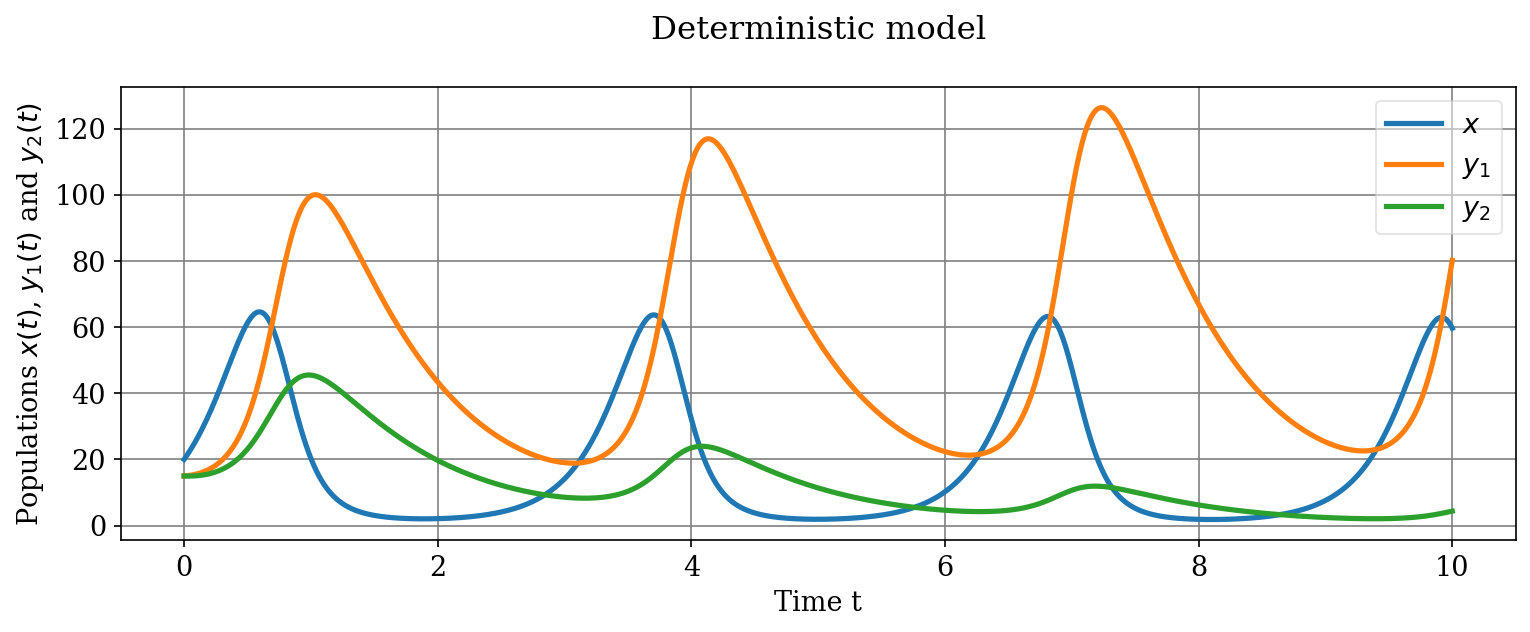

In [12]:
# численное решение ОДУ для модели 2 хищника-жертва

F = de.func_for_rk(XX, k_plus, f)

p = (a, b_1, b_2, c_1, c_2)= [4.5,1.2,1.1,0.07,0.05]    
OO = [20,15,15]                  

rk = RK.RK(3)
td, x = rk.integrate(F, OO, (0.0, 10), h=0.01, func_params=p)

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)

title = "Deterministic model\n"

ax1.set_title(title)
ax1.set_xlabel("Time t")
ax1.set_ylabel("Populations $x(t)$, $y_1(t)$ and $y_2(t)$")

ax1.plot(td, x[0],  label=u'$x$',  lw=2.5)
ax1.plot(td, x[1],  label=u'$y_1$', lw=2.5)
ax1.plot(td, x[2],  label=u'$y_2$', lw=2.5)

ax1.legend(ncol=1)

ax1.grid(True, color='grey')

In [13]:
AA=de.matr_A(XX, k_plus, p, f)
BB=de.matr_B(XX, k_plus, p, g)

In [14]:
time_interval = (0.0, 10.0)
h = 0.01
N = int((time_interval[1] - time_interval[0])/h)
sim_nums = np.arange(0,50,1)  

array_of_xss1 = np.empty((N,len(sim_nums)))
array_of_xss2 = np.empty((N,len(sim_nums)))
array_of_xss3 = np.empty((N,len(sim_nums)))

for sim_num in sim_nums:
    dt, t, dW, W = sde.wiener_process(N, dim=3, interval=time_interval)
    y = sde.EulerMaruyamaWm_NEW(AA, BB, h, OO, dW*0.01)
    array_of_xss1[:, sim_num] = y.T[0]
    array_of_xss2[:, sim_num] = y.T[1]
    array_of_xss3[:, sim_num] = y.T[2]

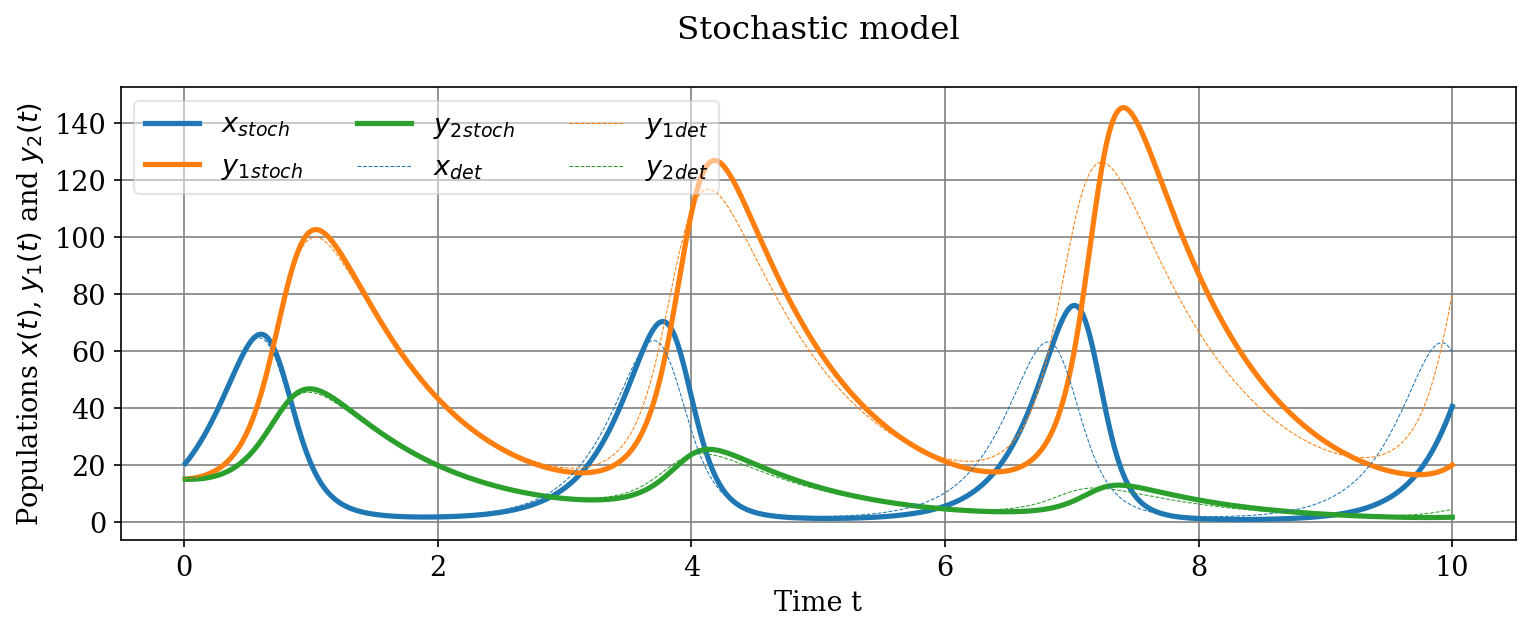

In [16]:
fig3 = plt.figure(3)
ax3 = fig3.add_subplot(1,1,1)

title = "Stochastic model\n"
ax3.set_title(title)
ax3.set_xlabel("Time t")
ax3.set_ylabel("Populations $x(t)$, $y_1(t)$ and $y_2(t)$")

Ex1 = array_of_xss1.mean(axis=-1)
Ex2 = array_of_xss2.mean(axis=-1)
Ex3 = array_of_xss3.mean(axis=-1)

ax3.plot(t, Ex1,  label='$x_{stoch}$', lw=2.5)
ax3.plot(t, Ex2,  label='${y_1}_{stoch}$', lw=2.5)
ax3.plot(t, Ex3,  label='${y_2}_{stoch}$', lw=2.5)

ax3.plot(td, x[0], color='#1f77b4', label=u'$x_{det}$',ls='--',   lw=0.5)#
ax3.plot(td, x[1],  color='#ff7f0e' , label=u'${y_1}_{det}$',ls='--', lw=0.5)#
ax3.plot(td, x[2],  color='#2ca02c', label=u'${y_2}_{det}$',ls='--',  lw=0.5)#

ax3.grid(True, color='grey')
ax3.legend(ncol=3)